# Finding parameters of signals in noise - CHALLENGING

Let's revisit our example of signals in noise from week 10. I'll copy code across from that notebook to add a weak-ish signal to noise

In [1]:
# standard imports
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal


In [2]:
def make_signal_and_data(
    signal_loudness,
    random_seed=21,
    sample_rate = 32, # 32 samples per second
    length_of_data = 128, # 128 seconds worth of data. MUST BE A MULTIPLE OF 8!
    signal_gaussian_width = 1.,
    signal_chirpiness = 1.,
):

    # Some settings for the data
    num_data_samples = length_of_data*sample_rate # 128 seconds worth of data
    times = np.arange(num_data_samples) / sample_rate

    # Make the signal
    signal_inst_frequency = 2. + signal_chirpiness*np.sin(2 * np.pi * 0.1 * times)
    phases = [0]
    for i in range(1,len(times)):
        phases.append(phases[-1] + 2 * np.pi * signal_inst_frequency[i] * 1./sample_rate)
    signal = np.sin(phases)
    gaussian = np.exp( - (times - 64)**2 / (2 * signal_gaussian_width))
    signal = gaussian * np.sin(phases)
    # This takes a quarter of the signal (centered on the peak) to add to the data.
    # The signal should be 0, or close to it, outside of this period.
    signal = signal[length_of_data*3//8 * sample_rate:length_of_data*5//8 * sample_rate]

    # Make the noise, and add a signal to the noise at an unknown spot
    # Set seed so we get the same dataset!
    np.random.seed(random_seed)
    noise = np.random.normal(size=[num_data_samples])
    rndi = np.random.randint(0,sample_rate*(length_of_data*3//4))
    data = noise
    data[rndi:rndi+len(signal)] += signal*signal_loudness
    
    return data, signal


Text(0, 0.5, 'Data')

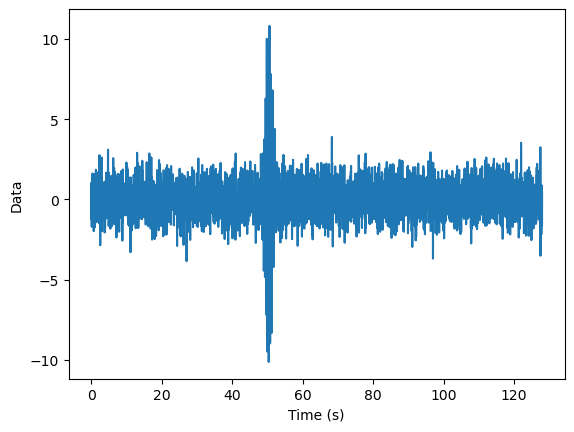

In [3]:
signal_loudness = 10
data, signal = make_signal_and_data(signal_loudness)
plt.plot(np.arange(32*128) / 32, data)
plt.xlabel('Time (s)')
plt.ylabel('Data')


## Inferring parameters

Now we know what we added to the noise here (and we could detect this with high significance). But what if we didn't know what the parameters were? In this case there are 4 unknown parameters:

* signal_gaussian_width
* signal_chirpiness
* Time of the signal (central time)
* Amplitude of the signal

We now have all the tools to infer these parameters from the previous notebook. All we need are the ingredients:

### Likelihood

The *log* likelihood is given by

$$ 0.5  \bigl( 2  \left\langle d | s \right\rangle - \left\langle s | s\right\rangle \bigr) $$

where

$$ \left\langle d | s \right\rangle $$

represents the cross correlation between the data ($d$) and the signal ($s$) and

$$ \left\langle s | s \right\rangle $$

represents the cross-correlation between the signal and itself. These are both scalars, and you already have code for this from previous lectures. The signal here *must not* be normalized, such that the amplitude of the signal should correspond exactly to what you think is in the data. You'll need to extract code to generate a signal as a function of these 4 parameters from what's given above.

### Prior

You can choose a prior. 

### Running it

With these in play you can infer these parameters and make a "corner plot" like what appeared in notebook 04. Are these tools applicable in the coursework?